
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations 😊

    
Good luck! 😊 
    

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Ken! Congratulations on submitting computer vision project! 🎉

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! There're just a couple of issues, but it will not take much time. If you have any questions, feel free to ask.
    
    
    
<hr>
    
Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
    
<hr>
    
Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">

As a technical note: it seems like this notebook was meant to be taken from the previous exercise as a starting point, so I've taken the liberty of manually copying that work to this one. Was that supposed to happen automatically?

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment ✔️</h2>
    
Correct. 

</div>

# Introduction  

We've been tasked with evaluating this possibility: can data science help the Good Seed supermarket chain prevent sales of alcohol to underage customers? The idea is to use security cameras in the checkout area, using the images of customers there and perform regression on them to estimate customer age. We've been given a set of photographs as starting data for this task.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment ✔️</h2>
    
Good introduction! 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ⚠️ </h2>
    
Please don't forget about project titles :) 
    
</div>

## Initialization

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen = ImageDataGenerator(rescale=1.0 / 255) #no validation_split for the moment

datagen_flow = datagen.flow_from_dataframe(
    labels, 
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    class_mode='raw',
    seed=101010
)

image_data = datagen_flow.next()

Found 7591 validated image filenames.


In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
print(type(image_data)) #tuple containing images and what appear to be age labels
images = np.array(image_data[0])
print(type(images))
print(images.shape)

<class 'tuple'>
<class 'numpy.ndarray'>
(32, 256, 256, 3)


Our dataset contains 7591 images of size 256x256 with three color channels.

## EDA

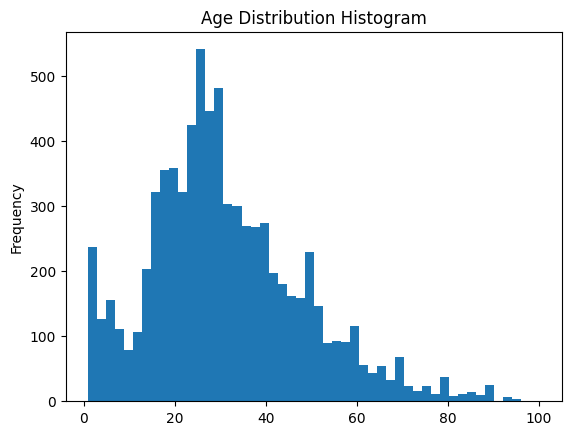

In [5]:
labels['real_age'].plot(kind='hist', bins=50, title='Age Distribution Histogram')
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ⚠️ </h2>
    
Don't forget to add both axes labels.     
</div>

Our age data looks roughly like a normal distribution, with the exception of a surprising number of children, and with some skew to the left such that the most common age demographic is 21-30 or so.

Since we're not allowed to sell alcohol to the under-21 demographic, how many people from the data are that young?

In [6]:
all_ages = labels['real_age'].sort_values(ascending=True)
young_count = all_ages[all_ages < 21].shape[0]
older_count = all_ages[all_ages >= 21].shape[0]
print('Customers under 21:', young_count)
print('Customers over 21:', older_count)
print('Percentage under 21:', young_count / (young_count + older_count))

Customers under 21: 2054
Customers over 21: 5537
Percentage under 21: 0.27058358582531944


About 27% of the images we were given are of individuals under 21, which means the remaining 73% are old enough to be buying alcohol. It's good to know our data actually includes people from both categories, as that would be an embarrassing way to mess up!

I say "both categories," and we could treat this as a categorization problem between "old enough to buy alcohol" and "not", but since age is a number, regression makes more sense. This way we can use metrics like Mean Absolute Error or Root Mean Squared Error to find out how close our model is, rather than treating all error as a binary between right and wrong.

We can actually display the images with matplotlib:

(256, 256, 3)


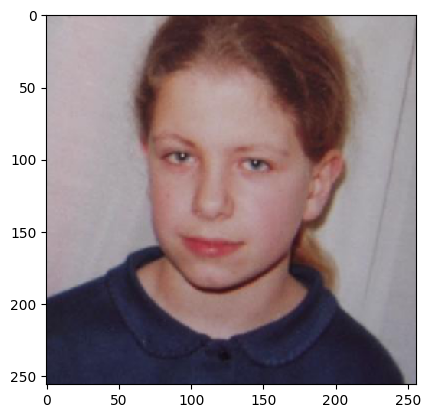

In [7]:
sample = images[0]
print(sample.shape)
plt.imshow(sample)
plt.show()

The original pixel data was read as floats from 0-255. We passed `rescale=1.0/255` to the ImageDataGenerator so that matplotlib could read them, or we could have converted them to `uint8` instead (which I actually did on a previous version of the project). 

Some additional images:

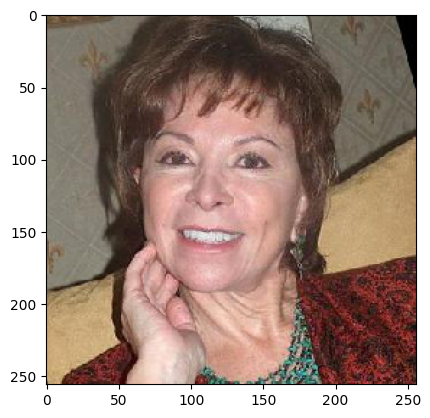

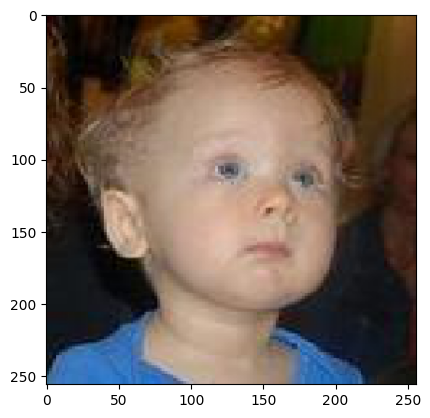

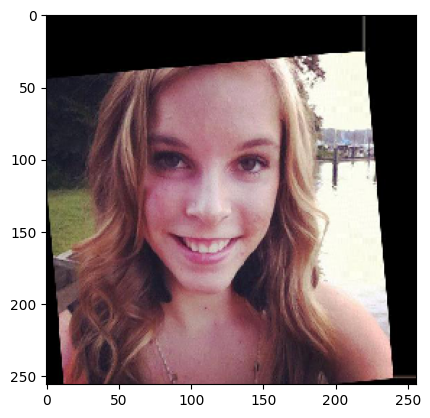

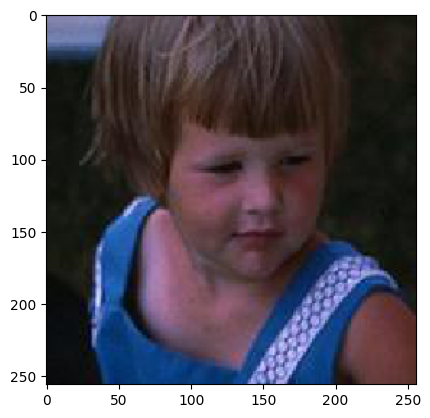

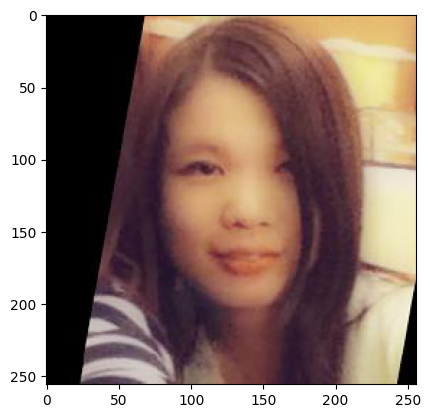

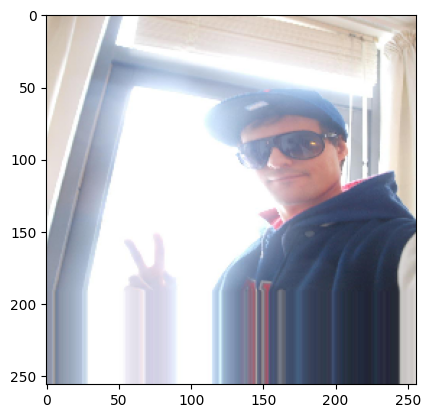

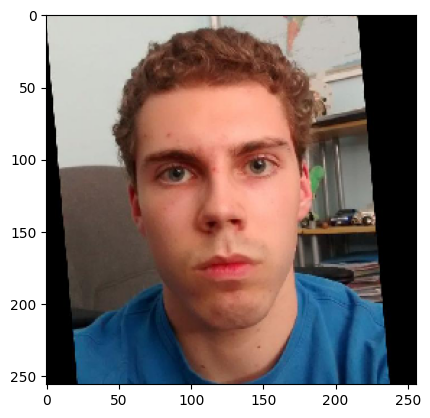

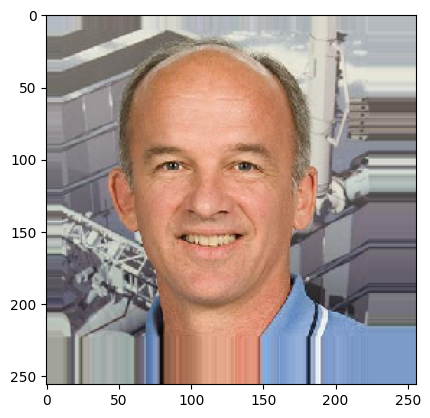

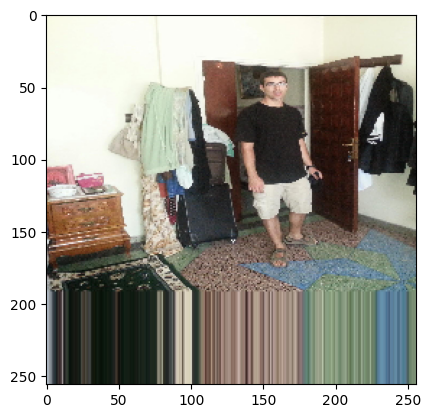

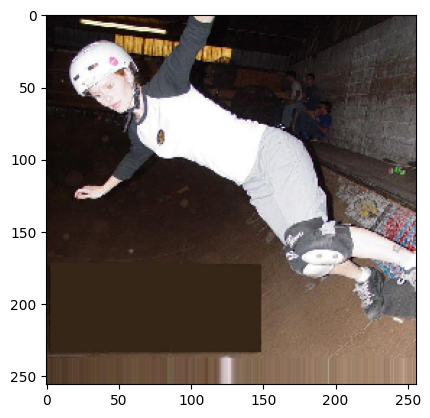

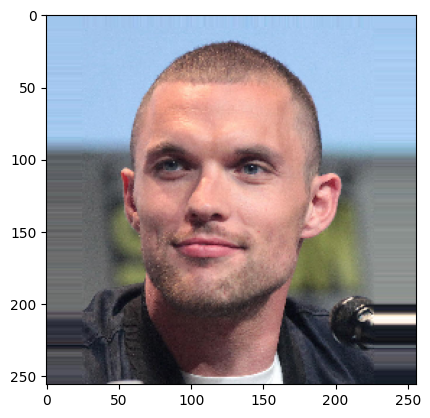

In [8]:
for i in range(1, 12):
    photo = images[i]
    plt.imshow(photo)
    plt.show()

It looks like we have quite a variety, not just demographically speaking but also in terms of image quality, poses, and the like.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment ⚠️ </h2>
    

`subplots` will make it look better. 

</div>

### Findings

Our dataset contains 7591 images of size 256x256 with 3 color channels; 27% of those images depict someone underage, while 73% of the depicted images are old enough to buy alcohol. Most frequently a customer will be 21-30 years old, per our histogram.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [9]:
def load_train(path):
    
    """
    Loads the train part of dataset from path
    """
    datagen = ImageDataGenerator(validation_split=0.25)
    
    train_gen_flow = datagen.flow_from_dataframe(
        labels, 
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        subset='train',
        rescale=1./255,
        seed=101010
    )

    return train_gen_flow

In [10]:
def load_test(path):
    
    """
    Loads the validation/test part of dataset from path
    """
    
    datagen = ImageDataGenerator(validation_split=0.25)

    test_gen_flow = datagen.flow_from_dataframe(
        labels, 
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        subset='validation',
        rescale=1./255,
        seed=101010
    )

    return test_gen_flow

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment ❌ </b>
    

Let's explicitly specify the `dataframe` (labels), `directory` (`path + 'final_files/`), `x_col`, and `y_col` in both train and test functions.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment ⚠️ </b>
    
    
I recommend that you use some variable for `seed`. 

</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">

Yeah, I see what I did wrong (used the arguments for flow_from_directory by mistake), hopefully the edit fits!
    
Agreed about having a variable for seed, I'll try to remember it in the future.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 ✔️</h2>
    
Correct. If you don't specify the paths, the code will not work. 

</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">

Below model is the sample given in the project instructions. Same goes for the `train_model` function.

</div>

In [11]:
def create_model(input_shape):
    
    """
    Defines our model, a ResNet50 neural network.
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment ✔️</h2>
    
Correct. 

</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [13]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

<div class="alert alert-info"; style="border-left: 7px solid blue">

Below, find the sample output given in the project instructions. (We are intended to do this this way, correct?)

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment ✔️</h2>
    
Yes. We have issues with our GPU, so you need to either run model locally or using Colab, or just copy the outputs. 
</div>

Epoch 1/20

356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921

Epoch 2/20

356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035

Epoch 3/20

356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454

Epoch 4/20

356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481

Epoch 5/20

356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192

Epoch 6/20

356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332

Epoch 7/20

356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359

Epoch 8/20

356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239

Epoch 9/20

356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529

Epoch 10/20

356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629

Epoch 11/20

356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866

Epoch 12/20

356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591

Epoch 13/20

356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467

Epoch 14/20

356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401

Epoch 15/20

356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841

Epoch 16/20

356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304

Epoch 17/20

356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

Epoch 18/20

356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226

Epoch 19/20

356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908

Epoch 20/20

356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512


## Conclusions

We were able to read, display, and perform some EDA on the image data provided. We then put together a script that could be sent to a GPU service to train a neural network. The validation MAE on the sample results provided got as low as 6.64, which happened at epoch 18. The model is rather overfit, though, as that's about double the MAE from the training set.

So, can we trust this model to identify persons too young to buy alcohol?

The answer is neither entirely yes nor entirely no. With a MAE of under 7, the model's guess is within 7 years of being correct the majority of the time. That's a substantial problem for teens and 20-somethings, but not for elderly folks.

I would propose to the owners of Good Seed that this model could be used as follows:

1. If the model guesses a person is over some age `N`, it does nothing.
2. If the model guesses a person is under `N`, it reminds the cashier to check ID.

This is contingent on a few things: first, that it's possible to have the model actively examining customers during store hours (which may be technically infeasible, or unpopular, or lead to some legal questions I'm not aware of); and second, an age `N` must be chosen so that the model never waves through someone who is underage, as that could lead to illegal sales. 

The model could also be used after-the-fact to identify employees that might not be complying with these laws, which would be a narrower use-case but less likely to cause issues. Instead of possibly causing a hassle during store hours, you'd just be identifying people who could use training or disciplinary action of some kind. That is contingent on store management correctly interpreting the feedback from the model, of course--since the model isn't perfect, presumably every employee would get pinged by it occasionally, so they'd have to look for outliers rather than being zero-tolerance about it.

The stakes for false positives and false negatives are very different here: a person who is incorrectly identified as underage may become disgruntled and cause a scene (which is why the cashier should check for ID, rather than refuse to serve that person entirely). However, a person who is incorrectly identified as *not* underage could result in some uncomfortable conversations with the authorities. 

A good suggestion might be to set `N` based on existing laws or corporate policies to the effect of "a person who appears to be under a certain age must be carded." Then all you're doing is having the model do what a person already is meant to do in that situation: guess the customer's age, then ask for ID if they seem under that age. 

Failing some precedent like that, you could take the model's metrics against some subset of the validation set; if you cut persons over 40 or 50 from that set, who are likely not going to get carded by the cashier even if the model incorrectly tells them to, you'd get the MAE with respect only to persons who might actually get carded. 

Another way to determine a fair `N` would be to simply find the oldest person who is incorrectly marked as underage by the model, then set `N` at that age. Or we could take the (non-absolute) error of each prediction, determine the 5th or 1st percentile error (so one of the biggest underestimations of someone's age), then base `N` on that number plus 21. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️ </h2>
    
    
Good. Although the model shows small overfitting, it is still good. We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training